In [15]:
from drn_interactions.io import load_neurons, load_waveforms
from scipy.ndimage import gaussian_filter1d, median_filter

In [4]:
df = load_waveforms()[["neuron_id", "waveform_index", "waveform_value"]]

In [7]:
df = df.pivot(index="waveform_index", columns="neuron_id", values="waveform_value")

In [25]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_multiple(dfs: List[pd.DataFrame], figsize=(4, 8), **kwargs):
    num_plots = len(dfs)
    f, axs = plt.subplots(num_plots, 1, figsize=figsize, constrained_layout=True)
    for i, df in enumerate(dfs):
        ax = axs[i]
        ax.plot(df.index, df.values, **kwargs)
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Amplitude (mV)")
        ax.set_title(f"Waveform {i}")
    return axs

def random_neuron(df: pd.DataFrame) -> pd.DataFrame:
    return df[[np.random.choice(df.columns)]]

def as_df(vals, df):
    return pd.DataFrame(vals, index=df.index, columns=df.columns)

array([<AxesSubplot:title={'center':'Waveform 0'}, xlabel='Time (ms)', ylabel='Amplitude (mV)'>,
       <AxesSubplot:title={'center':'Waveform 1'}, xlabel='Time (ms)', ylabel='Amplitude (mV)'>,
       <AxesSubplot:title={'center':'Waveform 2'}, xlabel='Time (ms)', ylabel='Amplitude (mV)'>,
       <AxesSubplot:title={'center':'Waveform 3'}, xlabel='Time (ms)', ylabel='Amplitude (mV)'>],
      dtype=object)

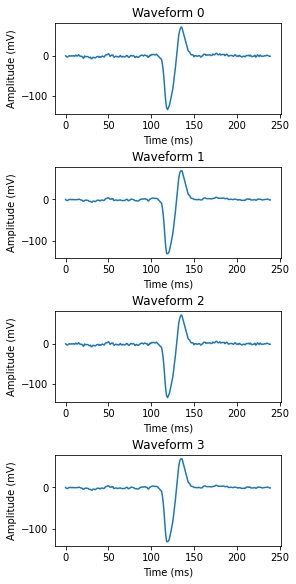

In [26]:
df1 = random_neuron(df)
med = as_df(median_filter(df1.values, size=3), df1)
gaus = as_df(gaussian_filter1d(df1.values, sigma=1), df1)
both = as_df(gaussian_filter1d(med, sigma=1), df1)
plot_multiple([df1, med, gaus, both])


<AxesSubplot:xlabel='waveform_index', ylabel='neuron_id'>

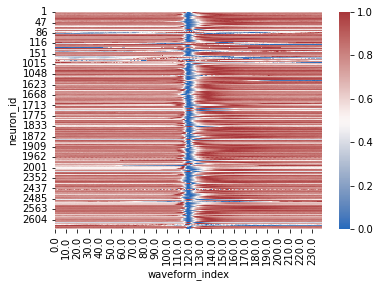

In [30]:
from sklearn.preprocessing import minmax_scale
import seaborn as sns

dfp = df.apply(minmax_scale)
sns.heatmap(dfp.transpose(), cmap="vlag")

In [37]:
example_wf = dfp.apply(np.median, axis=1).values

In [51]:
from scipy.signal import find_peaks
from scipy.spatial.distance import cosine

sorted_ser = dfp.apply(lambda x: cosine(x, example_wf)).sort_values()
idx = sorted_ser.index

In [111]:
def scale_to_pre(vals, num_pre, transformer):
    # vals = vals.
    transformer.fit(vals[:num_pre])
    return transformer.transform(vals).flatten()


from sklearn.preprocessing import MinMaxScaler, scale

dfp = (
    df
    .apply(
        lambda x: scale_to_pre(
            x.values.reshape(-1, 1), 
            num_pre=50, 
            transformer=MinMaxScaler())
            )
    .apply(minmax_scale)
)

<AxesSubplot:xlabel='waveform_index', ylabel='neuron_id'>

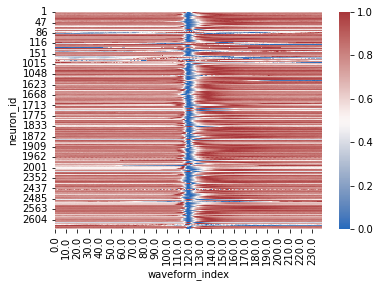

In [112]:
sns.heatmap(dfp.transpose(), cmap="vlag")

<AxesSubplot:xlabel='waveform_index', ylabel='neuron_id'>

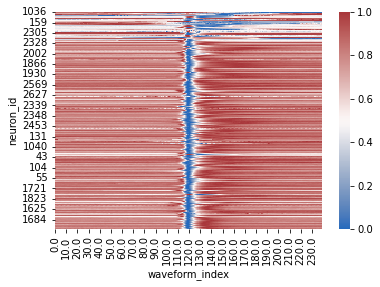

In [132]:
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans


# X = dfp.apply(median_filter,size=26).transpose().values
# idx = GaussianMixture(n_components=15).fit_predict(X)
idx = IsolationForest().fit_predict(X)


dfp2 = dfp.transpose().reindex(np.array(dfp.columns)[np.argsort(idx)])

sns.heatmap(dfp2, cmap="vlag")

In [133]:
(idx == -1).sum()

75

<AxesSubplot:xlabel='waveform_index', ylabel='neuron_id'>

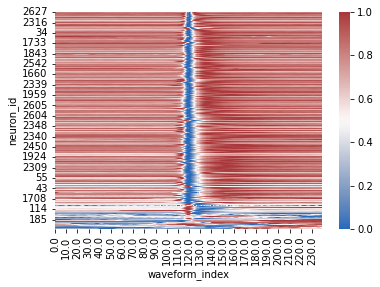

In [85]:
from scipy.stats import variation


dfp = df.apply(median_filter, size=3).apply(gaussian_filter1d, sigma=1).apply(minmax_scale)


sorted_ser = dfp.apply(variation).sort_values()
idx = sorted_ser.index
dfp2 = dfp.transpose().reindex(idx)
sns.heatmap(dfp2, cmap="vlag")

<AxesSubplot:xlabel='index'>

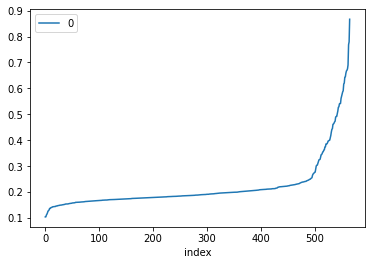

In [86]:
sorted_ser.reset_index().reset_index().plot(x="index", y=0)

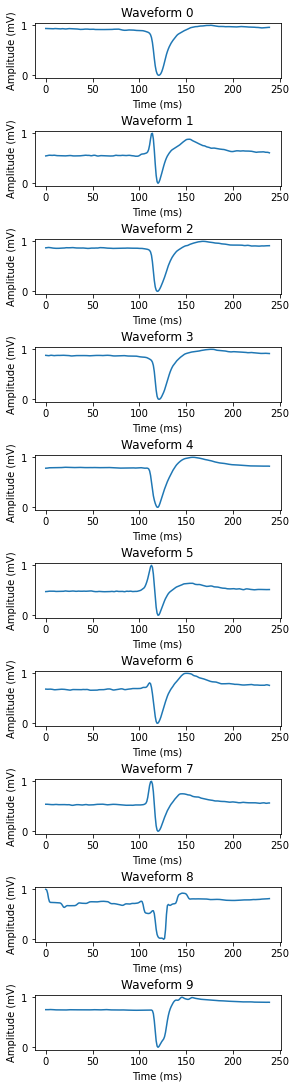

In [93]:
ser_list = [dfp2.iloc[460 + (1 * x)] for x in range(1, 11)]

_ = plot_multiple(ser_list, figsize=(4, 15))

In [44]:
from statsmodels.tsa.stattools import adfuller


In [46]:
df_res = df.apply(adfuller)

In [47]:
df_res

neuron_id,1,4,5,6,8,9,12,17,18,22,...,2622,2623,2624,2625,2626,2627,2628,2629,2630,2634
0,-4.591832,-7.762854,-4.791742,-5.058316,-5.68644,-3.473146,-3.498918,-3.212558,-3.560074,-3.10496,...,-3.977152,-4.059638,-4.334784,-4.944953,-3.336605,-4.102421,-4.127302,-5.059109,-1.268402,-3.521435
1,0.000134,0.0,0.000056,0.000017,0.000001,0.008704,0.008015,0.019269,0.006572,0.026188,...,0.001535,0.001128,0.000386,0.000028,0.013319,0.00096,0.000873,0.000017,0.643502,0.007453
2,5,5,5,3,1,8,4,4,4,6,...,6,7,5,6,7,9,7,3,13,12
3,234,234,234,236,238,231,235,235,235,233,...,233,232,234,233,232,230,232,236,226,227
4,"{'1%': -3.4586084859607156, '5%': -2.873972159...","{'1%': -3.4586084859607156, '5%': -2.873972159...","{'1%': -3.4586084859607156, '5%': -2.873972159...","{'1%': -3.4583663275730476, '5%': -2.873866099...","{'1%': -3.458128284586202, '5%': -2.8737618352...","{'1%': -3.4589796764641, '5%': -2.874134715866...","{'1%': -3.4584868856997004, '5%': -2.873918902...","{'1%': -3.4584868856997004, '5%': -2.873918902...","{'1%': -3.4584868856997004, '5%': -2.873918902...","{'1%': -3.458731141928624, '5%': -2.8740258764...",...,"{'1%': -3.458731141928624, '5%': -2.8740258764...","{'1%': -3.458854867412691, '5%': -2.8740800599...","{'1%': -3.4586084859607156, '5%': -2.873972159...","{'1%': -3.458731141928624, '5%': -2.8740258764...","{'1%': -3.458854867412691, '5%': -2.8740800599...","{'1%': -3.459105583381277, '5%': -2.8741898504...","{'1%': -3.458854867412691, '5%': -2.8740800599...","{'1%': -3.4583663275730476, '5%': -2.873866099...","{'1%': -3.4596204846395824, '5%': -2.874415302...","{'1%': -3.4594900381360034, '5%': -2.874358189..."
5,1384.375174,1759.271314,1338.268802,1282.413392,1272.111984,1272.684228,1297.64864,1167.578127,1260.474956,1147.72303,...,3400.93383,1814.259491,1723.39811,1495.562448,1134.774619,1756.374433,1352.2497,1379.458925,2198.80033,1255.119846
